# <b> Exploratory Data Analysis: Failed Bank List
### Author: Clayton Seabaugh
### Date: 9/27/2024

### Import Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import csv


In [2]:
df = pd.read_csv(r'C:\Users\clayt\Documents\datafun-06-eda\banklist.csv',  encoding='ISO-8859-1')
print(df.head)

<bound method NDFrame.head of                                 Bank Name           City  State   Cert   \
0    Republic First Bank dba Republic Bank   Philadelphia     PA  27332   
1                            Citizens Bank       Sac City     IA   8758   
2                 Heartland Tri-State Bank        Elkhart     KS  25851   
3                      First Republic Bank  San Francisco     CA  59017   
4                           Signature Bank       New York     NY  57053   
..                                     ...            ...    ...    ...   
564                     Superior Bank, FSB       Hinsdale     IL  32646   
565                    Malta National Bank          Malta     OH   6629   
566        First Alliance Bank & Trust Co.     Manchester     NH  34264   
567      National State Bank of Metropolis     Metropolis     IL   3815   
568                       Bank of Honolulu       Honolulu     HI  21029   

                  Acquiring Institution  Closing Date    Fund  
0    

### Initial Data Inspection

In [4]:
print(df.head(10))
print(df.shape)
print(df.dtypes)

                              Bank Name               City  State   Cert   \
0  Republic First Bank dba Republic Bank       Philadelphia     PA  27332   
1                          Citizens Bank           Sac City     IA   8758   
2               Heartland Tri-State Bank            Elkhart     KS  25851   
3                    First Republic Bank      San Francisco     CA  59017   
4                         Signature Bank           New York     NY  57053   
5                    Silicon Valley Bank        Santa Clara     CA  24735   
6                      Almena State Bank             Almena     KS  15426   
7             First City Bank of Florida  Fort Walton Beach     FL  16748   
8                   The First State Bank      Barboursville     WV  14361   
9                     Ericson State Bank            Ericson     NE  18265   

                Acquiring Institution  Closing Date    Fund  
0    Fulton Bank, National Association     26-Apr-24  10546  
1            Iowa Trust & Sa

### Initial Descriptive Statistics

In [5]:
print(df.describe())

              Cert           Fund
count    569.000000    569.000000
mean   31653.056239  10042.210896
std    16464.868900   1110.637083
min       91.000000   4645.000000
25%    20115.000000  10118.000000
50%    32102.000000  10260.000000
75%    35372.000000  10402.000000
max    59017.000000  10546.000000


Initial Data Distribution for Numerical Columns

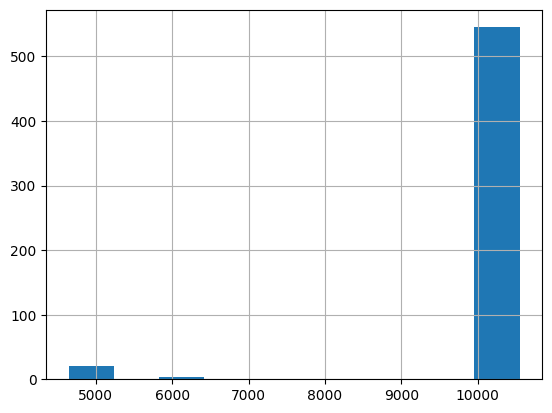

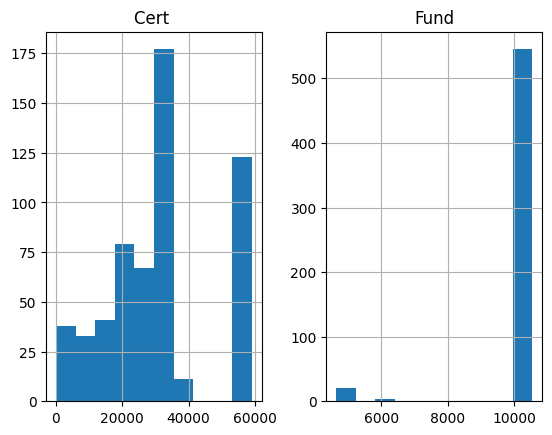

In [9]:
# Inspect histogram for "fund" column
df['Fund'].hist()

# Inspect histograms for all numerical columns
df.hist()

# Show all plots
plt.show()

### Initial Data Distribution for Categorical Columns

In [ ]:
df['city']